<a href="https://colab.research.google.com/github/khushbushah28/Computational_photography/blob/master/Facialcrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face 1


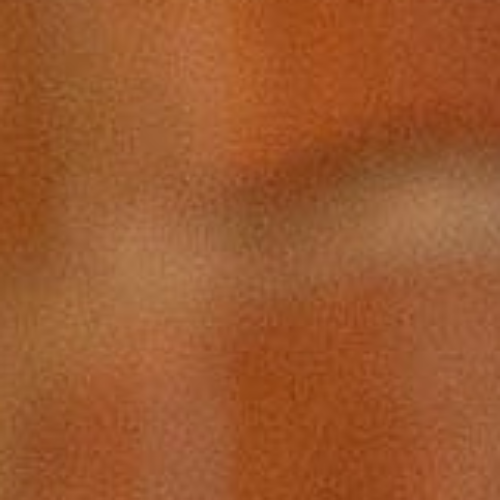

Face 2


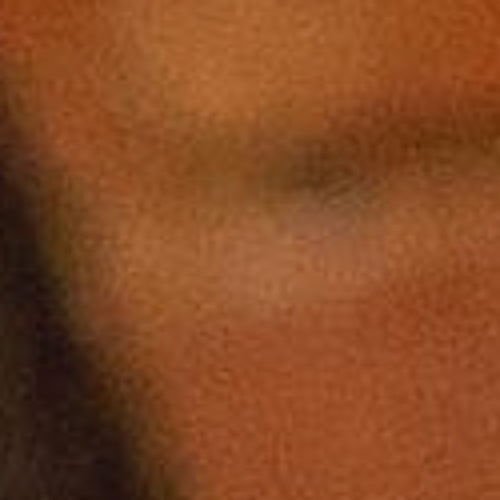

Face 3


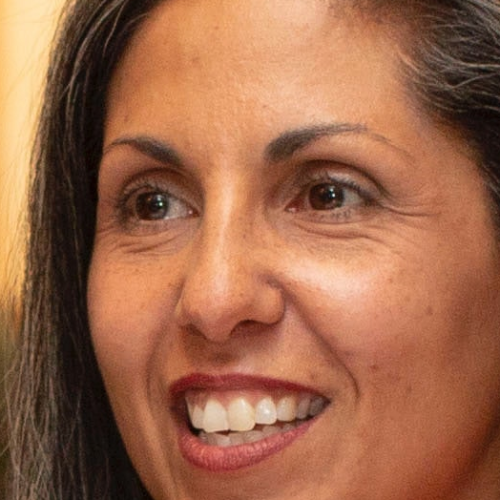

Face 4


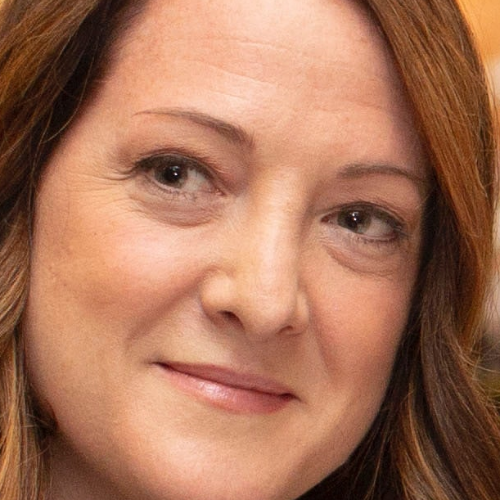

Face 5


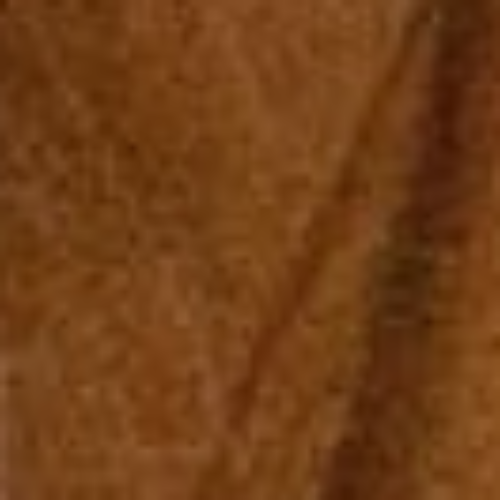

In [6]:
import cv2
from google.colab.patches import cv2_imshow

def resize_faces(image_path, output_size=(500, 500)):
    """
    Detects faces in an image, crops, and resizes them.

    Parameters:
    image_path (str): Path to the image file.
    output_size (tuple): Desired size for the cropped faces. Default is (500, 500).

    Returns:
    list: A list of cropped and resized face images.
    """
    # Load the pre-trained Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale (Haar Cascade detector expects a grayscale image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # List to store cropped and resized faces
    cropped_resized_faces = []

    # Loop over the face detections
    for (x, y, w, h) in faces:
        # Crop the face from the image
        face = image[y:y + h, x:x + w]

        # Resize the cropped face
        resized_face = cv2.resize(face, output_size)

        # Add the resized face to the list
        cropped_resized_faces.append(resized_face)

    return cropped_resized_faces

# Example usage
image_path = '/content/women.jpg'  # Replace with your image path
faces = resize_faces(image_path)

# Display and save the faces
for i, face in enumerate(faces):
    print(f"Face {i+1}")
    cv2_imshow(face)
    cv2.imwrite(f"resized_cropped_face_{i+1}.jpg", face)

cv2.waitKey(0)
cv2.destroyAllWindows()